In [1]:
using Distributions
using Random
@time using StatsPlots
default(fmt=:png)

 10.534188 seconds (5.39 M allocations: 311.488 MiB, 1.54% gc time, 1.35% compilation time: 95% of which was recompilation)


In [2]:
X = [fill(1, 25); fill(2, 12); fill(3, 3); fill(4, 3); fill(5, 3); 22]
X = X - rand(length(X))
@show X;

X = [0.757347757855168, 0.6818361976560459, 0.8626610394066628, 0.552897788928335, 0.3510241367798528, 0.335773585221778, 0.46378915538468435, 0.08782911453358355, 0.6199847447199845, 0.3938853540594821, 0.7282862915287471, 0.8874239547976106, 0.31441411333166513, 0.02110015024074363, 0.7689498041350116, 0.34999493168017537, 0.46278643911351147, 0.3933315133368679, 0.3233766147475252, 0.8322469352738259, 0.621136658856936, 0.964802499262299, 0.5413798726827543, 0.9927316662086118, 0.9277203441981052, 1.575546622453781, 1.2558173578348146, 1.3913518508541214, 1.9830748035623622, 1.2528620637126728, 1.1507282790978655, 1.851432785002651, 1.110444422450663, 1.70498178489559, 1.7263996971317557, 1.9052141920465924, 1.7532571386085676, 2.4959589547627568, 2.623767444932514, 2.096327131277934, 3.3357350763994322, 3.206951505820872, 3.3156680121719964, 4.87467832900151, 4.566504811059229, 4.588932450358004, 21.448144675013495]


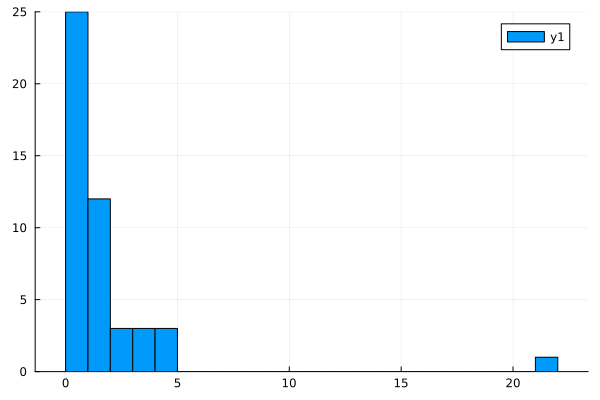

In [3]:
histogram(X)

In [4]:
(1 - 1/length(X))^length(X), 1/exp(1)

(0.36393076139545727, 0.36787944117144233)

In [5]:
function _sim(f!, μ, n, t; L=10^6)
    T = Vector{Float64}(undef, L)
    Ytmp = [Vector{t}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        Y = f!(Ytmp[Threads.threadid()])
        t = (mean(Y) - μ)/√(var(Y)/n)
        T[i] = t
    end
    T
end

_sim (generic function with 1 method)

In [6]:
function sim(X::AbstractVector; L=10^6)
    μ = mean(X)
    n = length(X)
    f!(Ytmp) = sample!(X, Ytmp)
    _sim(f!, μ, n, eltype(X); L)
end

sim (generic function with 1 method)

In [7]:
function sim(dist::UnivariateDistribution, n; L=10^6)
    μ = mean(dist)
    f!(Ytmp) = rand!(dist, Ytmp)
    _sim(f!, μ, n, eltype(dist); L)
end

sim (generic function with 2 methods)

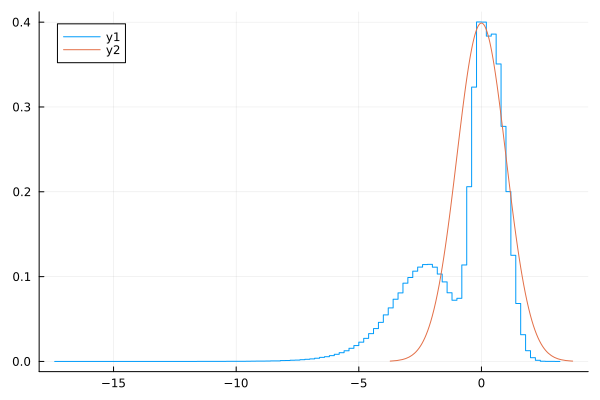

In [8]:
T = sim(X)
stephist(T; norm=true, bin=2^7)
plot!(Normal())

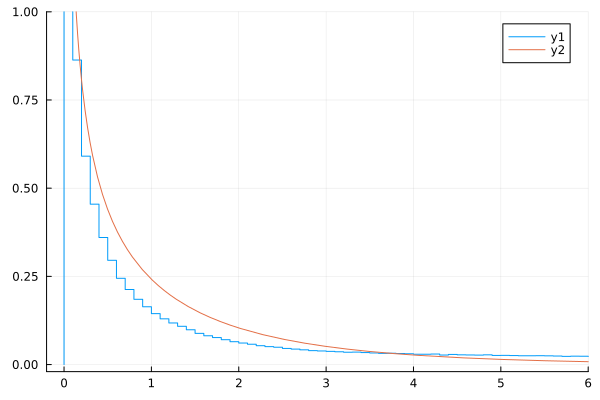

In [9]:
T = sim(X)
stephist(T .^ 2; norm=true)
plot!(Chisq(1))
plot!(xlim=(-0.2, 6), ylim=(-0.02, 1))

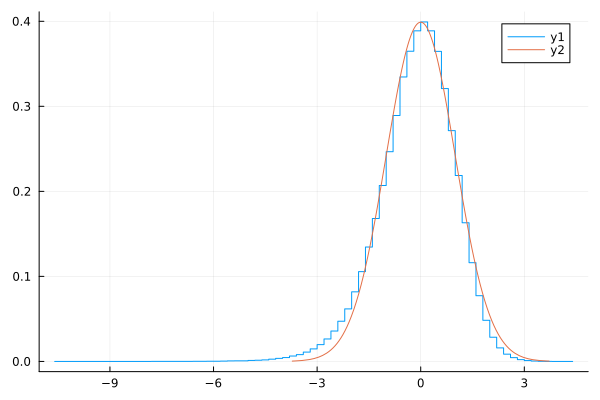

In [10]:
T = sim(X[1:end-1])
stephist(T; norm=true, bin=2^7)
plot!(Normal())

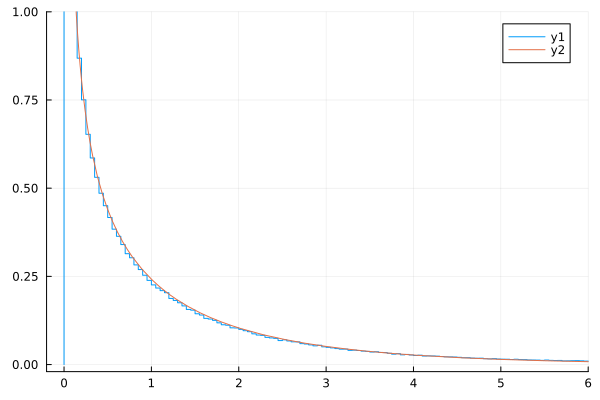

In [11]:
T = sim(X[1:end-1])
stephist(T .^ 2; norm=true)
plot!(Chisq(1))
plot!(xlim=(-0.2, 6), ylim=(-0.02, 1))

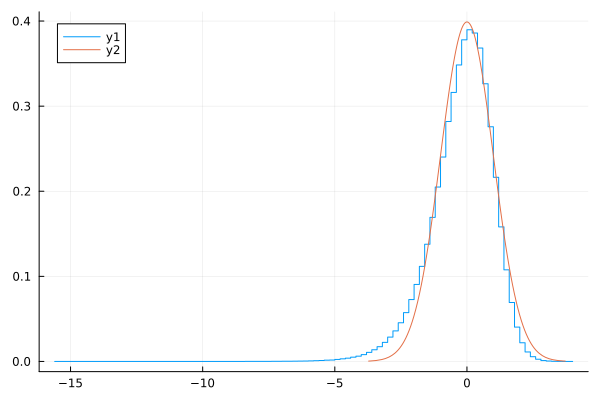

In [12]:
T = sim(Exponential(), 31)
stephist(T; norm=true, bin=2^7)
plot!(Normal())

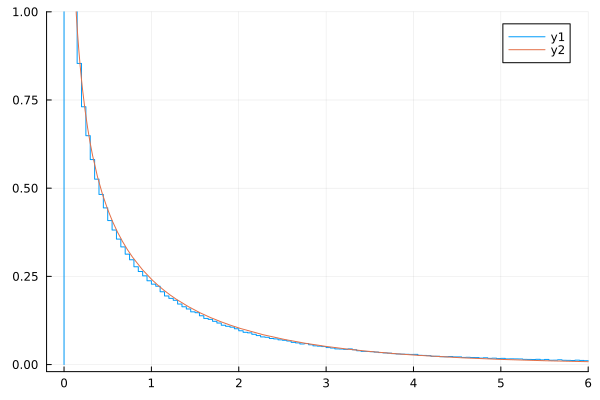

In [13]:
T = sim(Exponential(), 31)
stephist(T .^ 2; norm=true)
plot!(Chisq(1))
plot!(xlim=(-0.2, 6), ylim=(-0.02, 1))